In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
pip install squarify

In [15]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=6b290c244bb630811b50964debcc052e4696d3e6172fb1795165985dbe97fe6c
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [25]:
pip install stop-words

  Preparing metadata (setup.py) ... done
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32894 sha256=410f5d67a8fb2e62cf0ff03e6d5029922306c9f5ab4b4d860cc392bebc32ff2b
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
Successfully built stop-words


In [34]:
import re
import nltk
import json
import warnings
import squarify
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import plotly.express as px
from nltk.tag import pos_tag
from datetime import datetime
from langdetect import detect
import plotly.graph_objs as go
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.font_manager as fm
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from PIL import Image, ImageOps, ImageEnhance
from pandas.plotting import parallel_coordinates
from wordcloud import WordCloud, ImageColorGenerator
from sklearn.feature_extraction.text import TfidfVectorizer

warnings.filterwarnings("ignore")
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [125]:
!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123632 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

In [129]:

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정

In [37]:
warnings.filterwarnings("ignore")
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
# NLTK 데이터 다운로드
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
stopword = set(stopwords.words('english'))
stopword.update(['say','get','know','crosstalk','people','want','joe','would','think','go','much','that']) # for news

__경로 설정__

In [40]:
path='/content/drive/MyDrive/[인공지능기초]/analysis/news/'

__데이터 로드__

In [41]:
# 파일 불러오기
with open(path+'cbs_news_content.json', 'r') as f:
    cbs_data = json.load(f)

with open(path+'fox_news_content.json', 'r') as f:
    fox_data = json.load(f)

# 데이터프레임 생성
cbs_df = pd.DataFrame(cbs_data)
fox_df = pd.DataFrame(fox_data)

# 뉴스 소스 추가
cbs_df['news_source'] = 'CBS'
fox_df['news_source'] = 'FOX'

# 두 데이터프레임 합치기
df = pd.concat([cbs_df, fox_df], ignore_index=True)

In [42]:
df

,title,url,date,content,news_source,category
0,Josh Stein wins North Carolina governor's race...,https://www.cbsnews.com/news/josh-stein-north-...,2024-11-05,"Washington —Josh Stein, the North Carolina att...",CBS,NaN
1,"Pennsylvania officials say ""bad-faith"" challen...",https://www.cbsnews.com/news/pennsylvania-vote...,2024-11-05,"If the electionin Pennsylvaniais close, new ch...",CBS,NaN
2,Trump Media released earnings on Election Day....,https://www.cbsnews.com/news/donald-trump-medi...,2024-11-05,Donald Trump's Trump Media & Technology Group ...,CBS,NaN
3,What one stock market gauge is predicting abou...,https://www.cbsnews.com/news/election-2024-sto...,2024-11-05,"If history is any guide, one stock market gaug...",CBS,NaN
4,Why Trump can vote in the 2024 election even a...,https://www.cbsnews.com/news/can-donald-trump-...,2024-11-05,Although former President Donald Trump wasconv...,CBS,NaN
...,...,...,...,...,...,...
3336,Anti-Israel agitators invade Capitol Hill buil...,https://www.foxnews.com/us/anti-israel-agitato...,2024-07-23,close Video Activists gather inside Cannon bui...,FOX,foreign-policy
3337,Anti-Israel protesters arrested by police afte...,https://www.foxnews.com/video/6358999126112,2024-07-23,Protesters gathered in the Cannon Rotunda on T...,FOX,foreign-policy
3338,"Former Trump official reacts to Biden, Harris ...",https://www.foxnews.com/video/6358951122112,2024-07-23,"Rabbi Aryeh Lightstone, who served in the Trum...",FOX,foreign-policy
3339,"Biden, Harris admin has demonstrated weakness ...",https://www.foxnews.com/video/6358758029112,2024-07-21,Virginia Gov. Glenn Youngkin joins 'Sunday Mor...,FOX,foreign-policy



# 각 후보별 언급 빈도수 그래프


In [43]:
Fox=df[df.news_source=='FOX']
CP=df[(df.news_source=='CBS')]

In [44]:
Fox['MB']='Right'
CP['MB']='Left'

In [45]:
news=pd.concat([Fox, CP],ignore_index=True)

In [46]:
news

,title,url,date,content,news_source,category,MB
0,CNN accused of withholding critical documents ...,https://www.foxnews.com/media/cnn-accused-of-w...,2024-11-05,close Video CNN panel pushes back on liberal c...,FOX,executive,Right
1,GOP senator sends warning to Biden admin about...,https://www.foxnews.com/politics/gop-senator-s...,2024-11-05,close Video Women will put Kamala Harris over ...,FOX,executive,Right
2,Is your Social Security number at risk? Signs ...,https://www.foxnews.com/tech/your-social-secur...,2024-11-05,close Video Trump turns Social Security into a...,FOX,executive,Right
3,GOP prepared for pivotal court battles that co...,https://www.foxnews.com/politics/gop-prepared-...,2024-11-05,close Video lRNC Chairman Michael Whatley: 'We...,FOX,executive,Right
4,"Melania Trump reveals how she stays calm, cool...",https://www.foxnews.com/health/melania-trump-r...,2024-11-05,close Video Melania Trump tells 'Fox & Friends...,FOX,executive,Right
...,...,...,...,...,...,...,...
3336,"Transcript: Rep. Dean Phillips on ""Face the Na...",https://www.cbsnews.com/news/dean-phillips-min...,2024-07-21,The following is a transcript of an interview ...,CBS,NaN,Left
3337,"Transcript: Sen. Joe Manchin on ""Face the Nati...",https://www.cbsnews.com/news/joe-manchin-west-...,2024-07-21,The following is a transcript of an interview ...,CBS,NaN,Left
3338,"Manchin says Biden should drop 2024 bid and ""l...",https://www.cbsnews.com/news/joe-biden-2024-ca...,2024-07-21,Sen. Joe Manchin on Sunday joined a growing po...,CBS,NaN,Left
3339,"The GOP's one-man show, starring Donald Trump",https://www.cbsnews.com/news/the-gops-one-man-...,2024-07-21,"At American political conventions, there was o...",CBS,NaN,Left


In [47]:
# 영어 단어 추출을 위한 정규 표현식
eng = re.compile(r'\b[a-zA-Z]+\b')

# 불용어 제거 함수 정의
stop_words = set(stopwords.words('english'))

# 불용어 제거 함수 수정 (대소문자 고려 및 중요한 단어 유지)
def stopword(word_list):
    return [word for word in word_list if word.lower() not in stop_words or word.lower() in ['trump', 'harris']]

# 특정 단어의 빈도수를 반환하는 함수 수정 (대소문자 구분 없이 단어 체크)
def trump(freq_dist):
    return freq_dist['trump'] + freq_dist['Trump'] if 'trump' in freq_dist or 'Trump' in freq_dist else 0

def harris(freq_dist):
    return freq_dist['harris'] + freq_dist['Harris'] if 'harris' in freq_dist or 'Harris' in freq_dist else 0

# 뉴스 데이터에서 단어 빈도수 계산
news['trump_count'] = news['content'].str.findall(eng).apply(stopword).apply(FreqDist).apply(trump)
news['harris_count'] = news['content'].str.findall(eng).apply(stopword).apply(FreqDist).apply(harris)


# 뉴스 데이터에서 단어 빈도수 계산
news['trump_count'] = news['content'].str.findall(eng).apply(stopword).apply(FreqDist).apply(trump)
news['harris_count'] = news['content'].str.findall(eng).apply(stopword).apply(FreqDist).apply(harris)


In [48]:
news.date.value_counts()

,count
date,
2024-11-05,62
2024-07-23,61
2024-07-30,54
2024-08-20,54
2024-08-01,53
...,...
2024-08-31,14
2024-10-12,13
2024-09-14,13


In [49]:
count=news.groupby(['MB'])[['trump_count','harris_count']].sum()

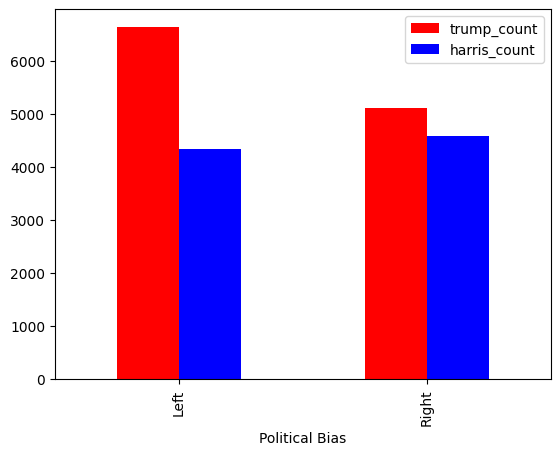

In [50]:
g=count.plot(kind='bar',xlabel='Political Bias',color=('r','b'))


# 일별 후보자 언급 빈도수


In [51]:
date_count=news.groupby(['date'])[['trump_count','harris_count']].sum()
date_count=date_count.T
date_count['name']=['Trump','Harris']

In [52]:
date_count

date,2024-07-21,2024-07-22,2024-07-23,2024-07-24,2024-07-25,2024-07-26,2024-07-27,2024-07-28,2024-07-29,2024-07-30,...,2024-10-28,2024-10-29,2024-10-30,2024-10-31,2024-11-01,2024-11-02,2024-11-03,2024-11-04,2024-11-05,name
trump_count,263,139,198,128,90,118,31,97,92,132,...,119,170,254,244,153,79,123,101,226,Trump
harris_count,138,174,246,235,134,159,36,108,148,139,...,96,94,109,188,103,42,71,72,92,Harris


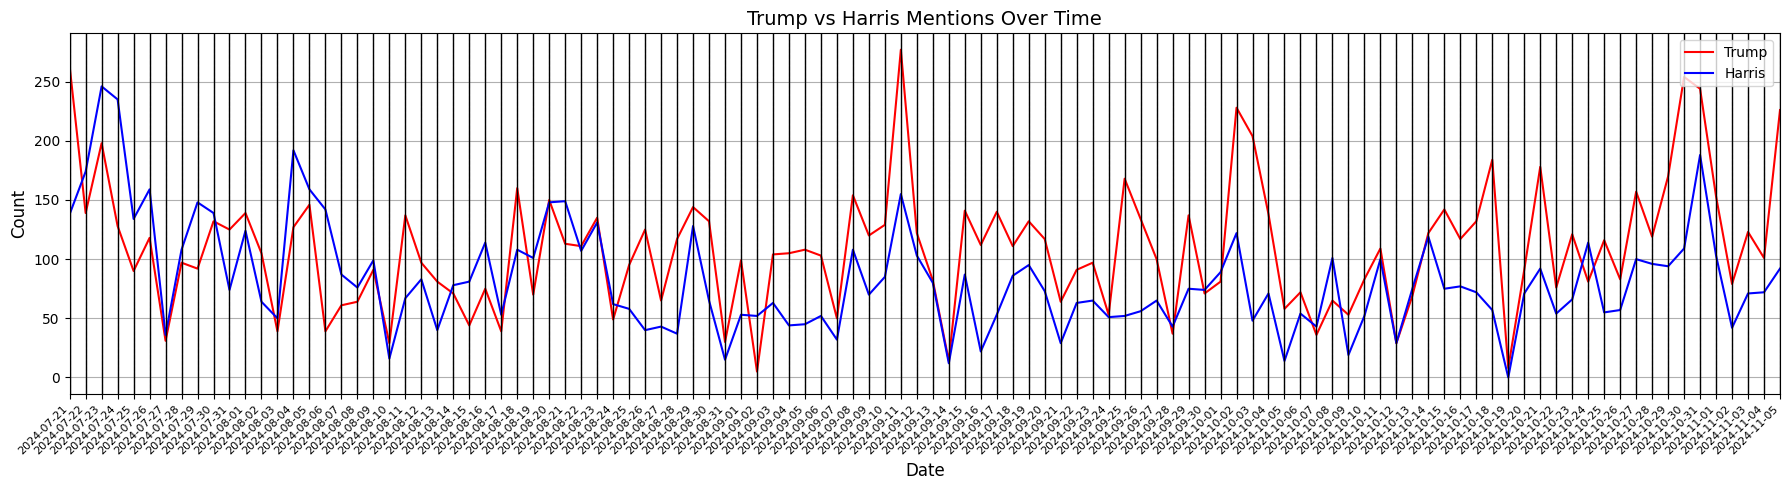

In [53]:
# 병렬 좌표 그래프 그리기
fig, ax = plt.subplots(1, 1, figsize=(18, 5))
parallel_coordinates(date_count, 'name', color=('r', 'b'), ax=ax)

# x축 라벨 회전 및 보기 쉽게 조정
plt.xticks(rotation=45, ha='right', fontsize=8)  # 글자 크기 조정으로 가독성 높임
plt.xlabel('Date', fontsize=12)  # x축 라벨 추가
plt.ylabel('Count', fontsize=12)  # y축 라벨 추가
plt.title('Trump vs Harris Mentions Over Time', fontsize=14)  # 그래프 제목 추가

# 그래프 출력 조정
plt.grid(axis='x', linestyle='--', alpha=0.7)  # x축 그리드를 점선으로 표시하여 구분
plt.tight_layout()

# 그래프 출력
plt.show()


# 이슈 기간 그래프


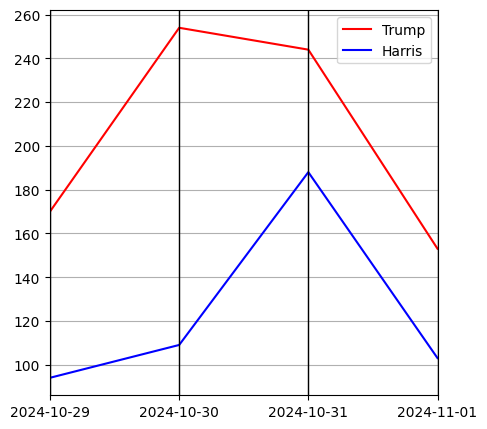

In [54]:
# date_count_issue=date_count[[48,49,50,51,52,53]].iloc[:,[1,3,5,7,9,11]]
date_count_issue=date_count[['2024-10-29', '2024-10-30', '2024-10-31', '2024-11-01']]
date_count_issue['name']=['Trump','Harris']

fig,ax=plt.subplots(1,1,figsize=(5,5))
parallel_coordinates(date_count_issue,'name',color=('r','b'),ax=ax)
# plt.savefig('frequency11.png',transparent=True)
plt.show()


# 기간별 후보자 언급 빈도수


In [55]:
# 'date' 칼럼을 datetime 형식으로 변환하고 주차 계산
news['date'] = pd.to_datetime(news['date'])

# 'Week' 칼럼 추가, 날짜에 따른 주차 계산
news['Week'] = news['date'].dt.isocalendar().week
news['Week'] = news['Week'] - 28
news


,title,url,date,content,news_source,category,MB,trump_count,harris_count,Week
0,CNN accused of withholding critical documents ...,https://www.foxnews.com/media/cnn-accused-of-w...,2024-11-05,close Video CNN panel pushes back on liberal c...,FOX,executive,Right,0,2,17
1,GOP senator sends warning to Biden admin about...,https://www.foxnews.com/politics/gop-senator-s...,2024-11-05,close Video Women will put Kamala Harris over ...,FOX,executive,Right,7,4,17
2,Is your Social Security number at risk? Signs ...,https://www.foxnews.com/tech/your-social-secur...,2024-11-05,close Video Trump turns Social Security into a...,FOX,executive,Right,1,0,17
3,GOP prepared for pivotal court battles that co...,https://www.foxnews.com/politics/gop-prepared-...,2024-11-05,close Video lRNC Chairman Michael Whatley: 'We...,FOX,executive,Right,2,1,17
4,"Melania Trump reveals how she stays calm, cool...",https://www.foxnews.com/health/melania-trump-r...,2024-11-05,close Video Melania Trump tells 'Fox & Friends...,FOX,executive,Right,16,0,17
...,...,...,...,...,...,...,...,...,...,...
3336,"Transcript: Rep. Dean Phillips on ""Face the Na...",https://www.cbsnews.com/news/dean-phillips-min...,2024-07-21,The following is a transcript of an interview ...,CBS,NaN,Left,2,1,1
3337,"Transcript: Sen. Joe Manchin on ""Face the Nati...",https://www.cbsnews.com/news/joe-manchin-west-...,2024-07-21,The following is a transcript of an interview ...,CBS,NaN,Left,2,2,1
3338,"Manchin says Biden should drop 2024 bid and ""l...",https://www.cbsnews.com/news/joe-biden-2024-ca...,2024-07-21,Sen. Joe Manchin on Sunday joined a growing po...,CBS,NaN,Left,3,1,1
3339,"The GOP's one-man show, starring Donald Trump",https://www.cbsnews.com/news/the-gops-one-man-...,2024-07-21,"At American political conventions, there was o...",CBS,NaN,Left,4,0,1


In [56]:
week_count=news.groupby(['Week'])[['trump_count','harris_count']].sum()
week_count=week_count.T

In [57]:
week_count

Week,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
trump_count,263,801,759,567,567,723,712,629,885,767,726,852,444,796,812,1142,327
harris_count,138,1092,791,646,557,756,381,396,592,421,407,472,419,471,538,703,164


In [58]:
c=list(range(1,18))
week_count.columns=list(map(lambda x:str(x)+' period',c))

In [59]:
week_count['name']=['Trump','Harris']

In [60]:
col=['1 period', '2 period', '3 period', '4 period', '5 period', '6 period',
       '7 period', '8 period', '9 period', '10 period', '11 period', '12 period', '13 period', '14 period', '15 period', '16 period',
       '17 period', 'name']

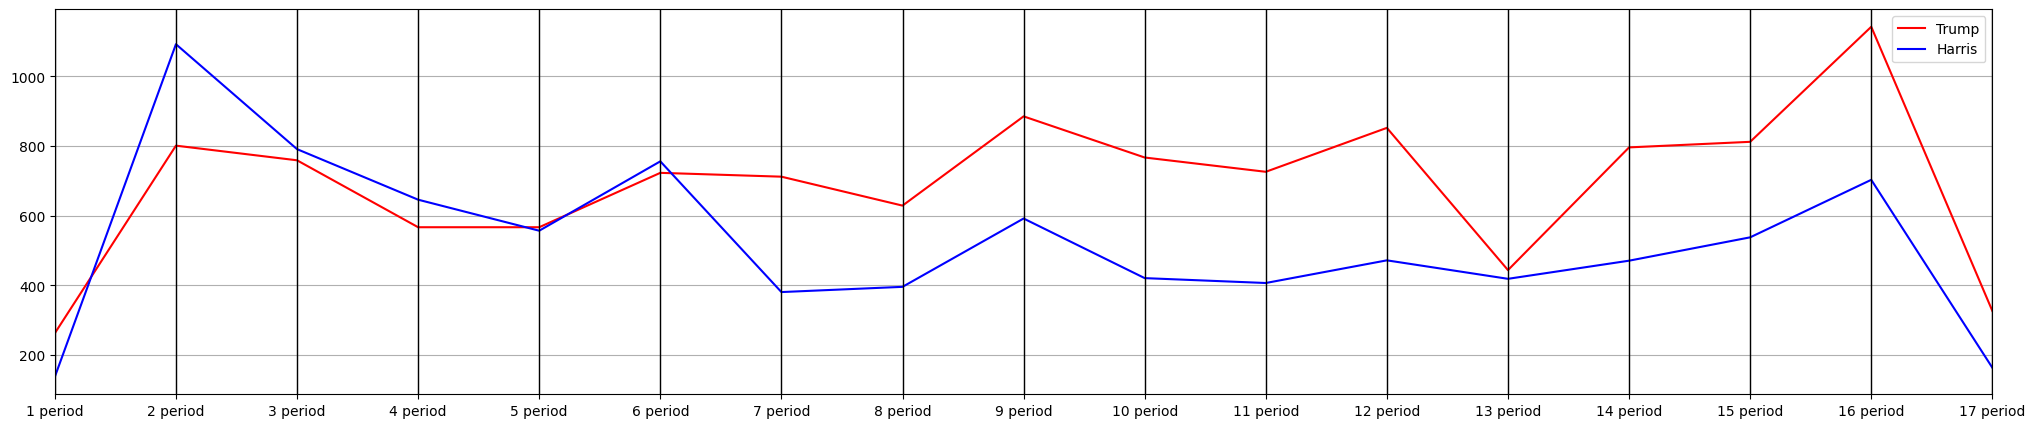

In [61]:
fig,ax=plt.subplots(1,1,figsize=(25,5))
parallel_coordinates(week_count[col],'name',color=('r','b'),ax=ax)

# plt.savefig('whole_fre.png',transparent=True)
plt.show()


# 언론사별 후보자 언급 빈도수


In [62]:
mb_count=news.groupby(['MB','Week'])[['trump_count','harris_count']].sum()
mb_count=mb_count.T

In [63]:
right=mb_count['Right']
left=mb_count['Left']

In [64]:
c=list(range(1,18))
right.columns=list(map(lambda x:str(x)+' period',c))
left.columns=list(map(lambda x:str(x)+' period',c))

In [65]:
right['name']=['Trump','Harris']
left['name']=['Trump','Harris']

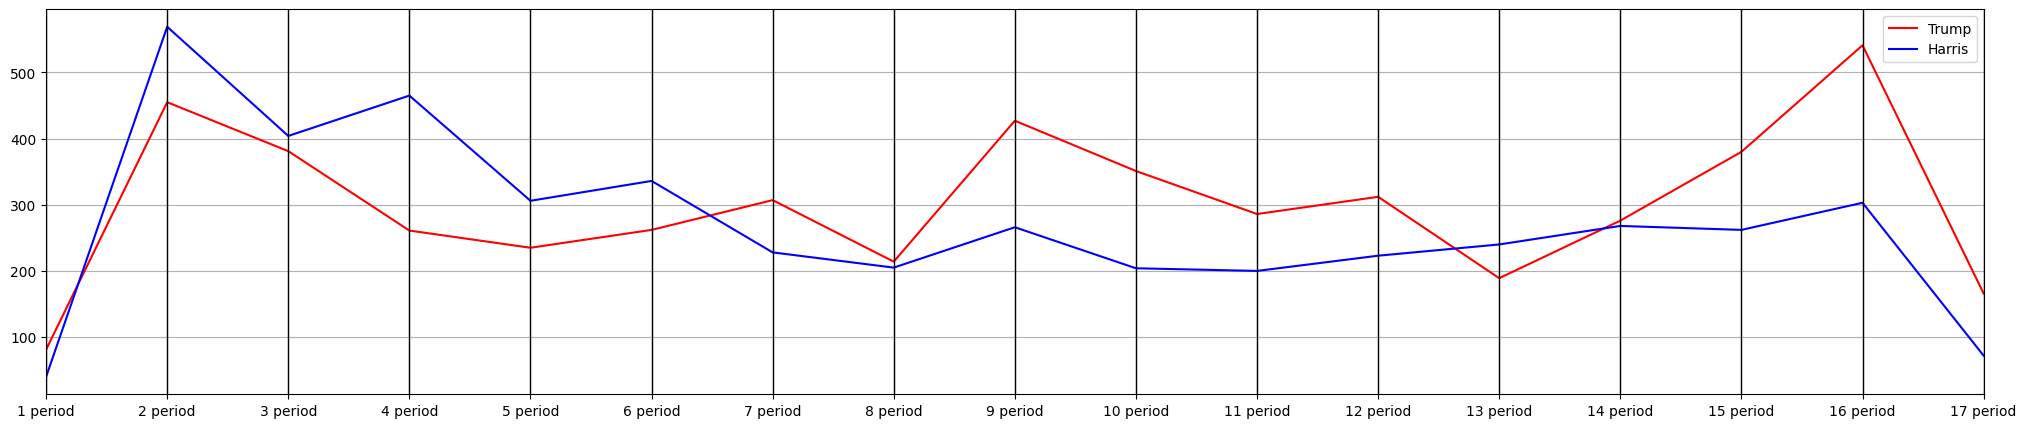

In [66]:
fig,ax=plt.subplots(1,1,figsize=(25,5))
parallel_coordinates(right[col],'name',color=('r','b'),ax=ax)
# plt.savefig('right_fre.png',transparent=True)
plt.show()

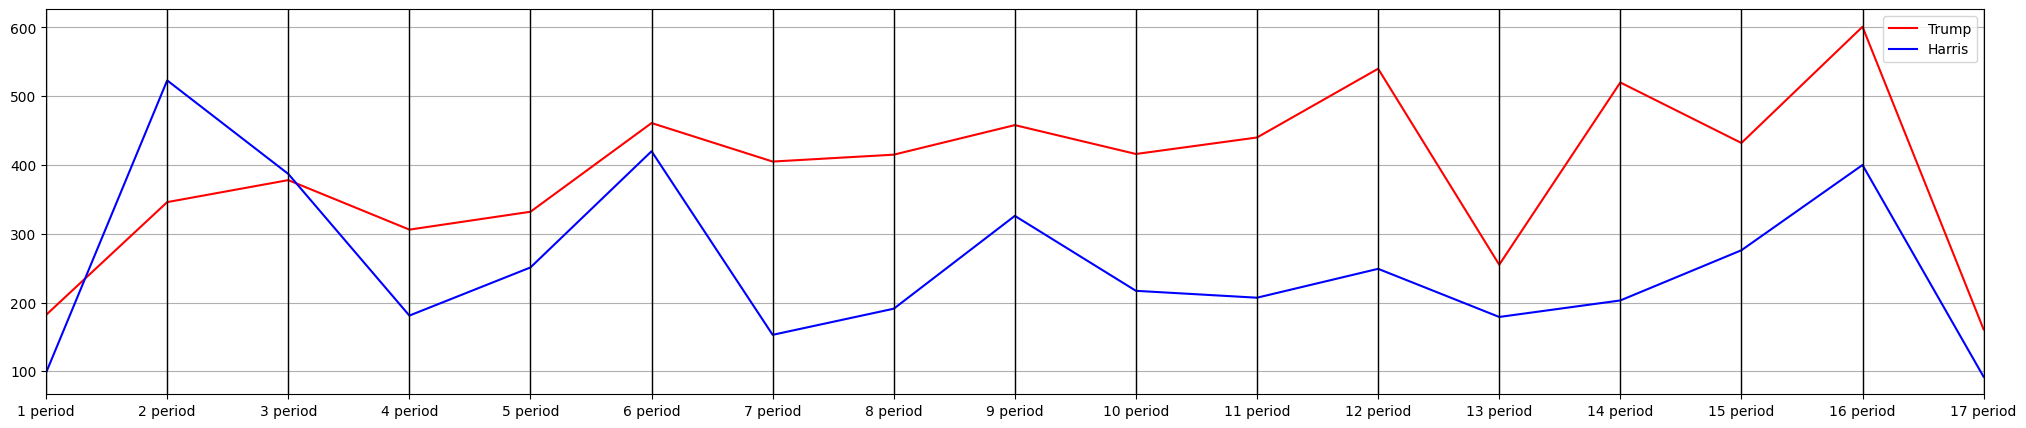

In [67]:
fig,ax=plt.subplots(1,1,figsize=(25,5))
parallel_coordinates(left[col],'name',color=('r','b'),ax=ax)
# plt.savefig('left_fre.png',transparent=True)
plt.show()


# 전체 키워드 top 10


In [69]:
# JSON 파일 불러오기 함수
def load_news_data(file_path, source_name):
    with open(file_path, 'r', encoding='utf-8') as file:
        news_content = json.load(file)
    print(f"{source_name} 정치 뉴스기사 수: {len(news_content)}개")
    return news_content

# 뉴스 데이터 로드
path='/content/drive/MyDrive/[인공지능기초]/analysis/news/'
fox_news_content = load_news_data(path+'fox_news_content.json', 'FOX News')
cbs_news_content = load_news_data(path+'cbs_news_content.json', 'CBS News')

stopword = set(stopwords.words('english'))
stopword.update(['say','get','know','crosstalk','people','want','joe','would','think','go','much','that',
                 'news', 'fox', 'president', 'said', 'trump', 'harris', 'us', 'biden', 'house', 'digital',
                 'former', 'state', 'also', 'video', 'new', 'images', 'click', 'election', 'one', 'senate',
                 'kamala', 'told', 'court', 'margaret', 'brennan', 'going', 'states', 'well', 'time', 'first',
                 'like', 'thats', 'cbs', 'two', 'vote', 'years', 'campaign', 'federal', 'report', 'white', 'getty',
                 'washington', 'right', 'voters', 'could', 'make', 'app', 'presidental', 'dont', 'back', 'last', 'mr',
                 'day', 'including', 'donald', 'trumps', 'according', 'im', 'year']) # for news

def analyze_top_words(news_content, source_name, top_n=10):
    all_text = ' '.join(article['content'].lower() for article in news_content)
    all_text = re.sub(r'[^\w\s]', '', all_text)
    words = word_tokenize(all_text)

    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stopword and word.isalpha()]
    word_counts = Counter(filtered_words)
    top_words = word_counts.most_common(top_n)

    df_top_words = pd.DataFrame(top_words, columns=['word', 'frequency'])
    df_top_words['rank'] = df_top_words['frequency'].rank(method='dense', ascending=False).astype(int)

    print(f"\n[{source_name}]에서 상위 {top_n}개 단어:")
    print(df_top_words)

    # 시각화
    plt.figure(figsize=(12, 6))
    squarify.plot(sizes=df_top_words['frequency'], label=df_top_words['word'] + '\n' + df_top_words['frequency'].astype(str), alpha=.8)
    plt.title(f'Top {top_n} Words in {source_name}')
    plt.axis('off')
    plt.show()

    return df_top_words

FOX News 정치 뉴스기사 수: 2201개
CBS News 정치 뉴스기사 수: 1140개


In [70]:
df_fox_top_words_df = pd.DataFrame(fox_news_content)
df_cbs_top_words_df = pd.DataFrame(cbs_news_content)

# 'date' 열을 datetime 형식으로 변환
df_fox_top_words_df['date'] = pd.to_datetime(df_fox_top_words_df['date'])
df_cbs_top_words_df['date'] = pd.to_datetime(df_cbs_top_words_df['date'])

# 특정 날짜 범위의 데이터 필터링
df_fox_top_words_df_filtered = df_fox_top_words_df[(df_fox_top_words_df['date'] >= '2024-10-29') & (df_fox_top_words_df['date'] <= '2024-11-01')]
df_cbs_top_words_df_filtered = df_cbs_top_words_df[(df_cbs_top_words_df['date'] >= '2024-10-29') & (df_cbs_top_words_df['date'] <= '2024-11-01')]


In [71]:
type(fox_news_content)

list

In [72]:
# 데이터프레임을 리스트로 변환
fox_news_list = df_fox_top_words_df_filtered.to_dict('records')
cbs_news_list = df_cbs_top_words_df_filtered.to_dict('records')


[FOX News]에서 상위 10개 단어:
           word  frequency  rank
0       garbage        165     1
1    supporters        145     2
2    republican        144     3
3         rally        136     4
4  pennsylvania        128     5
5   republicans        103     6
6        border         96     7
7         close         90     8
8        bidens         90     8
9          vice         80     9


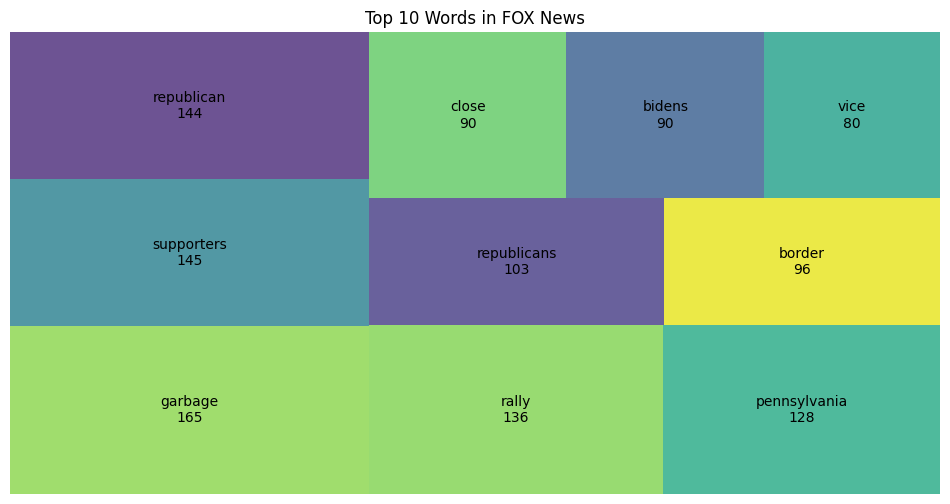


[CBS News]에서 상위 10개 단어:
           word  frequency  rank
0       ballots        141     1
1        ballot        135     2
2  pennsylvania         99     3
3        county         85     4
4     officials         80     5
5         voter         73     6
6        voting         68     7
7        puerto         66     8
8       supreme         65     9
9           law         64    10


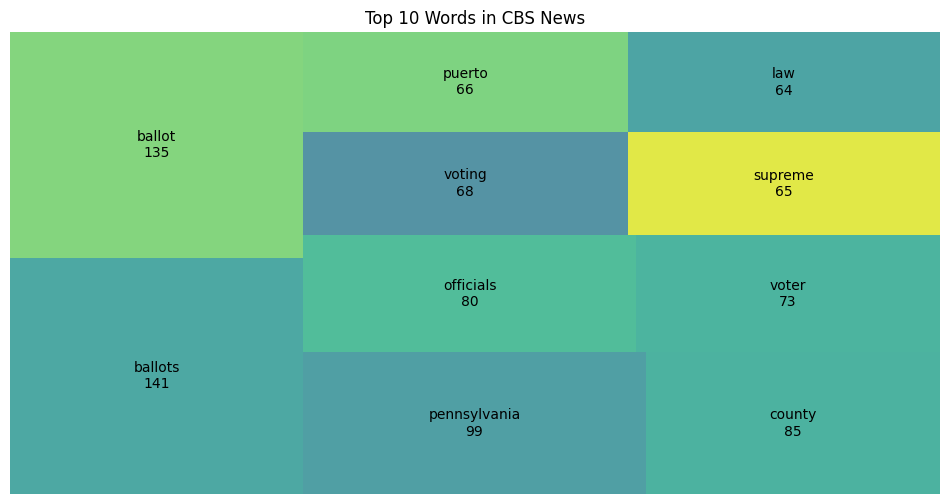

In [73]:
df_fox_top_words = analyze_top_words(fox_news_list, 'FOX News')
df_cbs_top_words = analyze_top_words(cbs_news_list, 'CBS News')

# top10 words의 결과를 보니 fox는 바이든의 '쓰레기'발언에 대해 공격하는 뉴스를 많이 생산하고, cbs는 상대적으로 중립을 유지


# 주별 기사량 추이

> 9월~10월 사이 각 언론사에서 나온 기사량 추이
> 10월 이후로 공화당을 지지하는 FOX의 기사량이 급증하는 것을 알 수 있음
> 성향별 그래프를 보았을 때 역시 보수언론의 정보제공량이 많음을 알 수 있다.

In [74]:
news

,title,url,date,content,news_source,category,MB,trump_count,harris_count,Week
0,CNN accused of withholding critical documents ...,https://www.foxnews.com/media/cnn-accused-of-w...,2024-11-05,close Video CNN panel pushes back on liberal c...,FOX,executive,Right,0,2,17
1,GOP senator sends warning to Biden admin about...,https://www.foxnews.com/politics/gop-senator-s...,2024-11-05,close Video Women will put Kamala Harris over ...,FOX,executive,Right,7,4,17
2,Is your Social Security number at risk? Signs ...,https://www.foxnews.com/tech/your-social-secur...,2024-11-05,close Video Trump turns Social Security into a...,FOX,executive,Right,1,0,17
3,GOP prepared for pivotal court battles that co...,https://www.foxnews.com/politics/gop-prepared-...,2024-11-05,close Video lRNC Chairman Michael Whatley: 'We...,FOX,executive,Right,2,1,17
4,"Melania Trump reveals how she stays calm, cool...",https://www.foxnews.com/health/melania-trump-r...,2024-11-05,close Video Melania Trump tells 'Fox & Friends...,FOX,executive,Right,16,0,17
...,...,...,...,...,...,...,...,...,...,...
3336,"Transcript: Rep. Dean Phillips on ""Face the Na...",https://www.cbsnews.com/news/dean-phillips-min...,2024-07-21,The following is a transcript of an interview ...,CBS,NaN,Left,2,1,1
3337,"Transcript: Sen. Joe Manchin on ""Face the Nati...",https://www.cbsnews.com/news/joe-manchin-west-...,2024-07-21,The following is a transcript of an interview ...,CBS,NaN,Left,2,2,1
3338,"Manchin says Biden should drop 2024 bid and ""l...",https://www.cbsnews.com/news/joe-biden-2024-ca...,2024-07-21,Sen. Joe Manchin on Sunday joined a growing po...,CBS,NaN,Left,3,1,1
3339,"The GOP's one-man show, starring Donald Trump",https://www.cbsnews.com/news/the-gops-one-man-...,2024-07-21,"At American political conventions, there was o...",CBS,NaN,Left,4,0,1


In [75]:
result = news.groupby(['Week', 'news_source']).size().unstack(fill_value=0)
result2 = result[result.index != 1]
result2

# 기존 Week 인덱스에 대응하는 날짜 범위 정의
date_ranges = {
    2: '7/22~7/28',
    3: '7/29~8/4',
    4: '8/5~8/11',
    5: '8/12~8/18',
    6: '8/19~8/25',
    7: '8/26~9/1',
    8: '9/2~9/8',
    9: '9/9~9/15',
    10: '9/16~9/22',
    11: '9/23~9/29',
    12: '9/30~10/6',
    13: '10/7~10/13',
    14: '10/14~10/20',
    15: '10/21~10/27',
    16: '10/28~11/3',
    17: '11/4~11/5'
}

# Week 인덱스를 날짜 범위로 변환
result2.index = result2.index.map(date_ranges)

# 결과 확인
print(result2)

news_source  CBS  FOX
Week                 
7/22~7/28     82  186
7/29~8/4      72  198
8/5~8/11      56  170
8/12~8/18     59  128
8/19~8/25    100  155
8/26~9/1      52  102
9/2~9/8       64  117
9/9~9/15      68  128
9/16~9/22     73  138
9/23~9/29     77  137
9/30~10/6     78  128
10/7~10/13    57  120
10/14~10/20   62  126
10/21~10/27   77  156
10/28~11/3    99  144
11/4~11/5     46   53


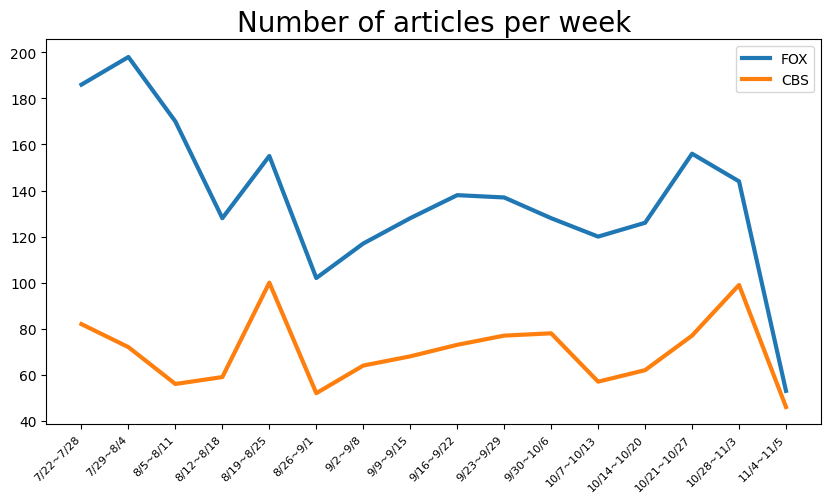

In [76]:
plt.figure(figsize=(10,5))
plt.plot(result2.index, result2['FOX'], linewidth =3)
plt.plot(result2.index, result2['CBS'], linewidth =3)

plt.xticks(rotation=45, ha='right', fontsize=8)  # 글자 크기 조정으로 가독성 높임
plt.title('Number of articles per week', fontsize = 20)
plt.legend(["FOX", "CBS"], prop={'size': 10})

# 트럼프 연관 단어 Wordcloud

In [77]:
news

,title,url,date,content,news_source,category,MB,trump_count,harris_count,Week
0,CNN accused of withholding critical documents ...,https://www.foxnews.com/media/cnn-accused-of-w...,2024-11-05,close Video CNN panel pushes back on liberal c...,FOX,executive,Right,0,2,17
1,GOP senator sends warning to Biden admin about...,https://www.foxnews.com/politics/gop-senator-s...,2024-11-05,close Video Women will put Kamala Harris over ...,FOX,executive,Right,7,4,17
2,Is your Social Security number at risk? Signs ...,https://www.foxnews.com/tech/your-social-secur...,2024-11-05,close Video Trump turns Social Security into a...,FOX,executive,Right,1,0,17
3,GOP prepared for pivotal court battles that co...,https://www.foxnews.com/politics/gop-prepared-...,2024-11-05,close Video lRNC Chairman Michael Whatley: 'We...,FOX,executive,Right,2,1,17
4,"Melania Trump reveals how she stays calm, cool...",https://www.foxnews.com/health/melania-trump-r...,2024-11-05,close Video Melania Trump tells 'Fox & Friends...,FOX,executive,Right,16,0,17
...,...,...,...,...,...,...,...,...,...,...
3336,"Transcript: Rep. Dean Phillips on ""Face the Na...",https://www.cbsnews.com/news/dean-phillips-min...,2024-07-21,The following is a transcript of an interview ...,CBS,NaN,Left,2,1,1
3337,"Transcript: Sen. Joe Manchin on ""Face the Nati...",https://www.cbsnews.com/news/joe-manchin-west-...,2024-07-21,The following is a transcript of an interview ...,CBS,NaN,Left,2,2,1
3338,"Manchin says Biden should drop 2024 bid and ""l...",https://www.cbsnews.com/news/joe-biden-2024-ca...,2024-07-21,Sen. Joe Manchin on Sunday joined a growing po...,CBS,NaN,Left,3,1,1
3339,"The GOP's one-man show, starring Donald Trump",https://www.cbsnews.com/news/the-gops-one-man-...,2024-07-21,"At American political conventions, there was o...",CBS,NaN,Left,4,0,1


In [116]:
FOX_news = news[news.news_source == 'FOX']
CBS_news = news[news.news_source == 'CBS']

In [117]:
# 2. 중복 제거
FOX_news.drop_duplicates(subset='content', inplace=True)

# 3. 불필요한 문자 제거
def clean_comment(comment):
    # URL 제거
    comment = re.sub(r'http\S+|www\.\S+', '', comment)
    # 이모지 및 특수 문자 제거
    comment = re.sub(r'[^a-zA-Z0-9\s]', '', comment)
    # 여백 정리
    comment = re.sub(r'\s+', ' ', comment).strip()
    return comment

FOX_news['cleaned_content'] = FOX_news['content'].apply(clean_comment)

# 4. 언어 감지 및 비영어 댓글 필터링
def is_english(comment):
    try:
        return detect(comment) == 'en'
    except:
        return False

# FOX_news = FOX_news[news['cleaned_content'].apply(is_english)]

# 5. 불용어 제거 (선택적)
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def remove_stopwords(comment):
    words = word_tokenize(comment)
    filtered_words = [word for word in words if word.lower() not in stopword]
    return ' '.join(filtered_words)

FOX_news['cleaned_content'] = FOX_news['cleaned_content'].apply(remove_stopwords)

# # 전처리 완료된 데이터 저장
# df.to_json('trump_debate_comments_cleaned.jsonl', orient='records', lines=True)

print("전처리 완료된 데이터가 저장되었습니다.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


전처리 완료된 데이터가 저장되었습니다.


In [118]:
corpus=FOX_news['cleaned_content'].values.tolist()

corpus_token = []
for sentence in corpus:
    for word in word_tokenize(sentence):
            corpus_token.append(word)

In [119]:
count_list = Counter(corpus_token)
#TOP 20
common_cl = count_list.most_common(100)
common_cl[:10]

[('2024', 2347),
 ('Republican', 1790),
 ('close', 1771),
 ('border', 1722),
 ('Israel', 1708),
 ('Democratic', 1343),
 ('Democrats', 1333),
 ('Vice', 1305),
 ('Rep', 1304),
 ('via', 1298)]

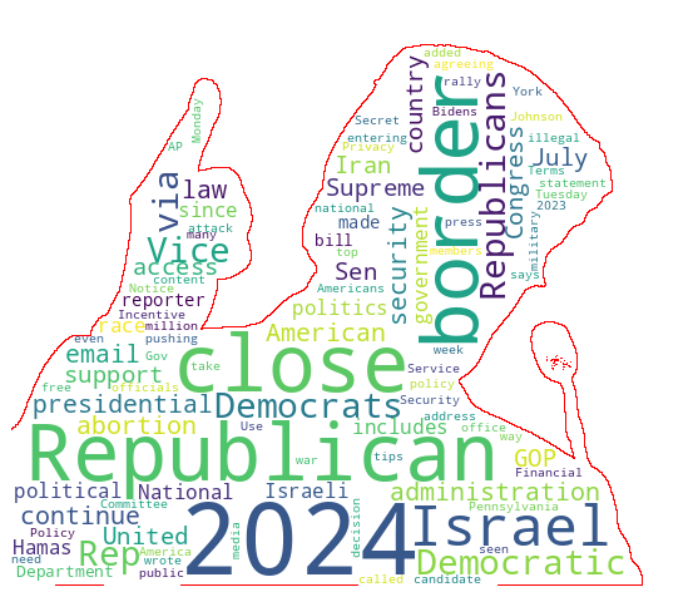

In [120]:
# 마스크 이미지 설정 및 전처리
mask_img_path = f"/content/drive/MyDrive/[인공지능기초]/analysis/news/trump_mask_img.png"
img = Image.open(mask_img_path).convert("L")  # 그레이스케일로 변환
enhancer = ImageEnhance.Brightness(img)
img_enhanced = enhancer.enhance(1.5)
mask = ImageOps.invert(img_enhanced)  # 불투명한 부분을 검은색으로, 투명한 부분을 흰색으로 변환
mask = np.array(mask)  # 배열로 변환

# 후보자에 따라 테두리 색상 설정
contour_color = 'red'

# wordcloud 생성
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    mask=mask,
    contour_width=0.7,
    contour_color=contour_color
).generate_from_frequencies(dict(common_cl))

# wordcloud 시각화
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 해리스연관 단어 Wordcloud

In [121]:
# 2. 중복 제거
CBS_news.drop_duplicates(subset='content', inplace=True)

# 3. 불필요한 문자 제거
def clean_comment(comment):
    # URL 제거
    comment = re.sub(r'http\S+|www\.\S+', '', comment)
    # 이모지 및 특수 문자 제거
    comment = re.sub(r'[^a-zA-Z0-9\s]', '', comment)
    # 여백 정리
    comment = re.sub(r'\s+', ' ', comment).strip()
    return comment

CBS_news['cleaned_content'] = CBS_news['content'].apply(clean_comment)

# 4. 언어 감지 및 비영어 댓글 필터링
def is_english(comment):
    try:
        return detect(comment) == 'en'
    except:
        return False

# CBS_news = CBS_news[news['cleaned_content'].apply(is_english)]

# 5. 불용어 제거 (선택적)
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def remove_stopwords(comment):
    words = word_tokenize(comment)
    filtered_words = [word for word in words if word.lower() not in stopword]
    return ' '.join(filtered_words)

CBS_news['cleaned_content'] = CBS_news['cleaned_content'].apply(remove_stopwords)

# # 전처리 완료된 데이터 저장
# df.to_json('trump_debate_comments_cleaned.jsonl', orient='records', lines=True)

print("전처리 완료된 데이터가 저장되었습니다.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


전처리 완료된 데이터가 저장되었습니다.


In [122]:
corpus=CBS_news['cleaned_content'].values.tolist()

corpus_token = []
for sentence in corpus:
    for word in word_tokenize(sentence):
            corpus_token.append(word)

In [123]:
from collections import Counter
count_list = Counter(corpus_token)
#TOP 20
common_cl = count_list.most_common(100)
common_cl[:10]

[('presidential', 1372),
 ('Democratic', 1156),
 ('Republican', 1139),
 ('country', 1120),
 ('American', 974),
 ('law', 921),
 ('support', 920),
 ('Vice', 905),
 ('administration', 897),
 ('Democrats', 896)]

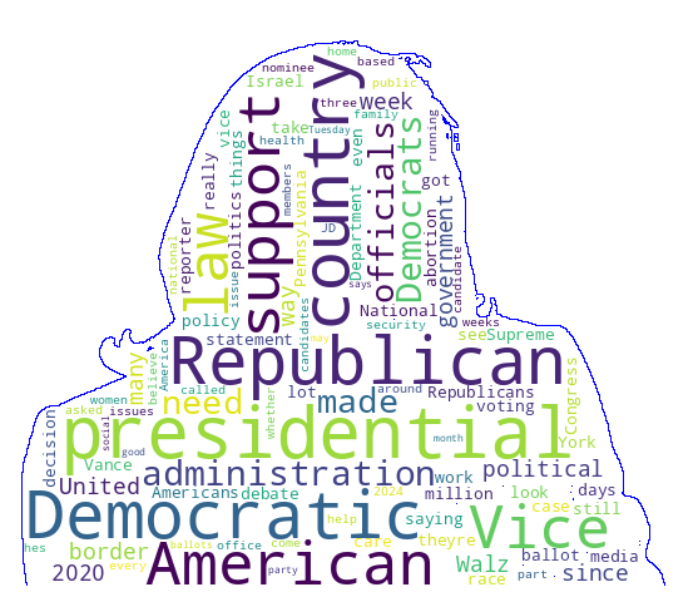

In [124]:
# 마스크 이미지 설정 및 전처리
mask_img_path = f"/content/drive/MyDrive/[인공지능기초]/analysis/news/harris_mask_img.png"
img = Image.open(mask_img_path).convert("L")  # 그레이스케일로 변환
enhancer = ImageEnhance.Brightness(img)
img_enhanced = enhancer.enhance(1.5)
mask = ImageOps.invert(img_enhanced)  # 불투명한 부분을 검은색으로, 투명한 부분을 흰색으로 변환
mask = np.array(mask)  # 배열로 변환

# 후보자에 따라 테두리 색상 설정
contour_color = 'blue'

# wordcloud 생성
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    mask=mask,
    contour_width=0.7,
    contour_color=contour_color
).generate_from_frequencies(dict(common_cl))

# wordcloud 시각화
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 그래프

In [130]:
# 5. 후보자 관련 단어 빈도 막대그래프 생성 함수
def generate_bargraph(df, candidate_name, source_name, top_n=20):
    """
    특정 후보자와 관련된 기사의 상위 단어를 막대 그래프로 시각화합니다.
    """
    candidate_lower = candidate_name.lower()

    # 후보자가 언급된 기사만 필터링
    candidate_articles = df[df[f'{candidate_lower}_mentioned']]

    # 모든 기사 내용을 하나의 텍스트로 결합
    all_text = ' '.join(candidate_articles['content'].tolist())

    # 소문자로 변환
    all_text = all_text.lower()

    # 구두점 제거
    all_text = re.sub(r'[^\w\s]', '', all_text)

    # 단어 토큰화
    words = word_tokenize(all_text)


    filtered_words = [word for word in words if word not in stopword and word.isalpha()]

    # 단어 빈도 계산
    word_counts = Counter(filtered_words)

    # 상위 N개 단어 추출
    top_words = word_counts.most_common(top_n)
    df_top_words = pd.DataFrame(top_words, columns=['word', 'frequency'])

    # 막대 그래프 생성
    plt.figure(figsize=(15, 8))
    plt.barh(df_top_words['word'][::-1], df_top_words['frequency'][::-1], color='skyblue')
    plt.xlabel('빈도수')
    plt.ylabel('단어')
    plt.title(f'{source_name}에서 {candidate_name} 관련 상위 {top_n} 단어', fontsize=16)
    plt.tight_layout()
    plt.show()

In [131]:
# 이후 분석을 위해 날짜, 내용, 인물 언급 여부 df로 처리하는 함수
def process_news_content(news_content, source_name):
    articles_data = []

    for article in news_content:
        # 날짜를 추출하여 날짜/시간 객체로 변환
        date_str = article['date']
        date = datetime.strptime(date_str, '%Y-%m-%d')

        content = article['content']

        # 소문자로 변환
        content_lower = content.lower()

        # 'trump' 또는 'harris'가 언급되었는지 확인
        trump_mentioned = 'trump' in content_lower
        harris_mentioned = 'harris' in content_lower

        articles_data.append({
            'date': date,
            'content': content,
            'trump_mentioned': trump_mentioned,
            'harris_mentioned': harris_mentioned
        })

    df = pd.DataFrame(articles_data)

    return df

df_fox = process_news_content(fox_news_content, 'FOX News')
df_cbs = process_news_content(cbs_news_content, 'CBS News')

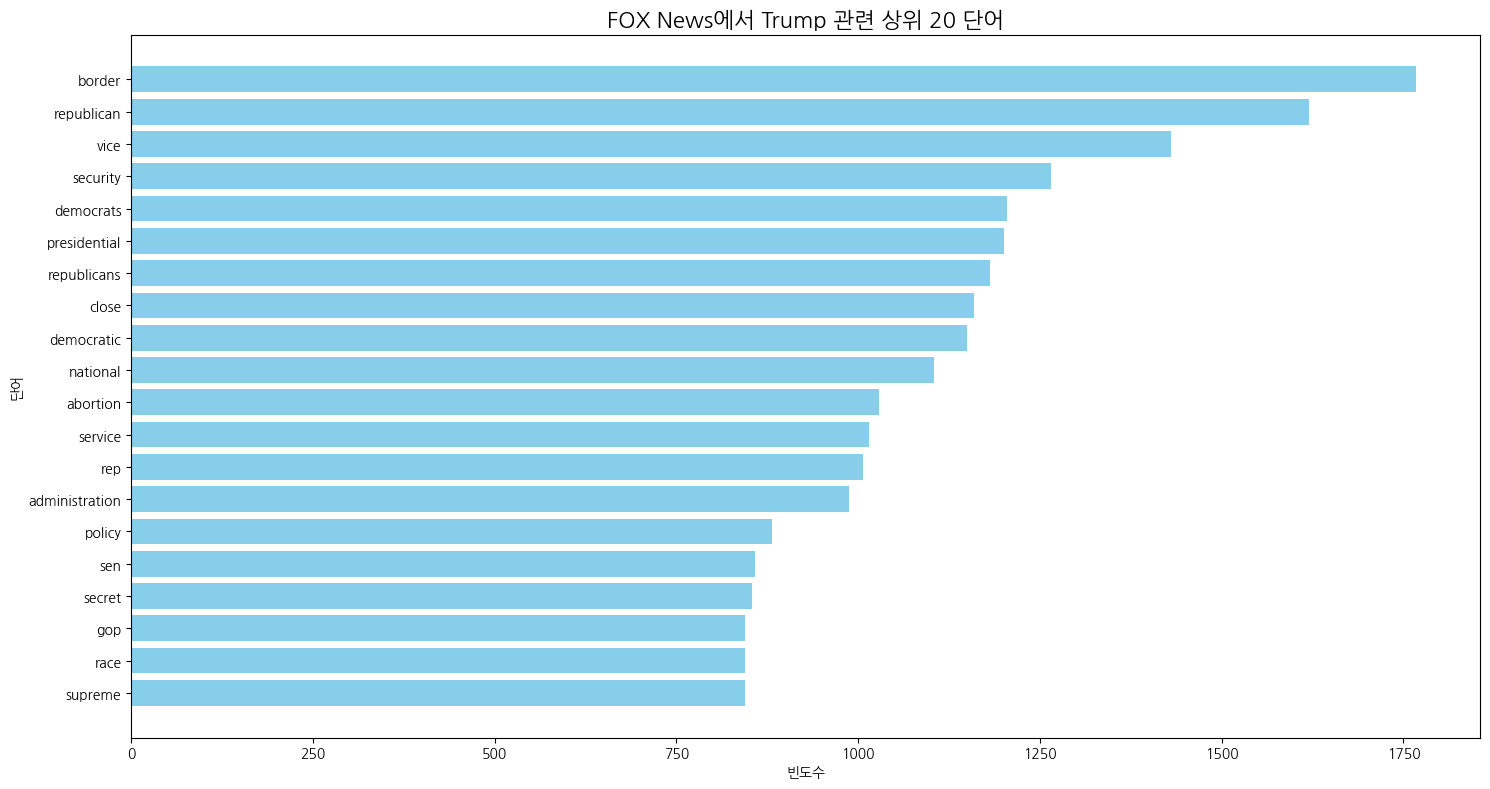

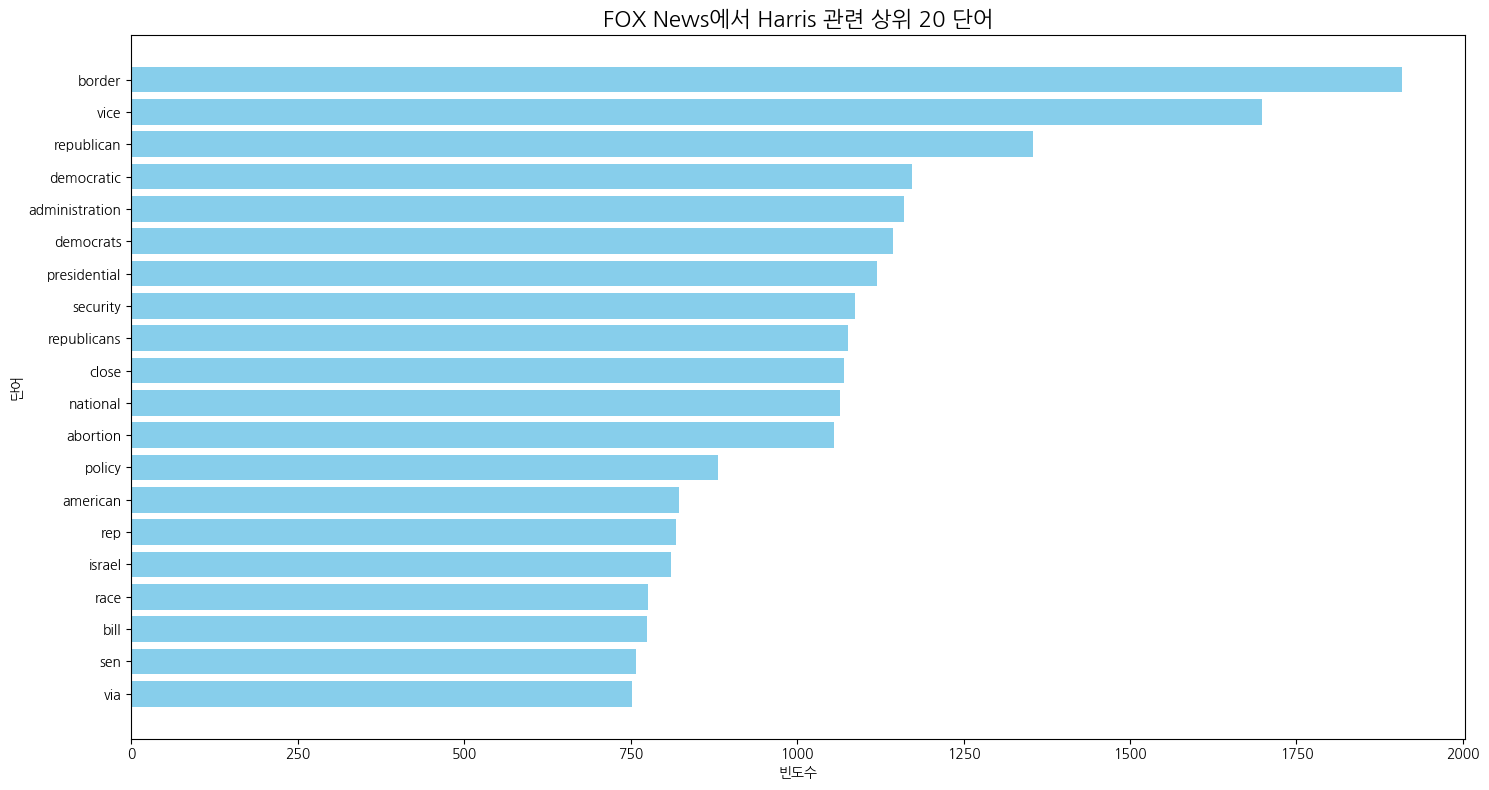

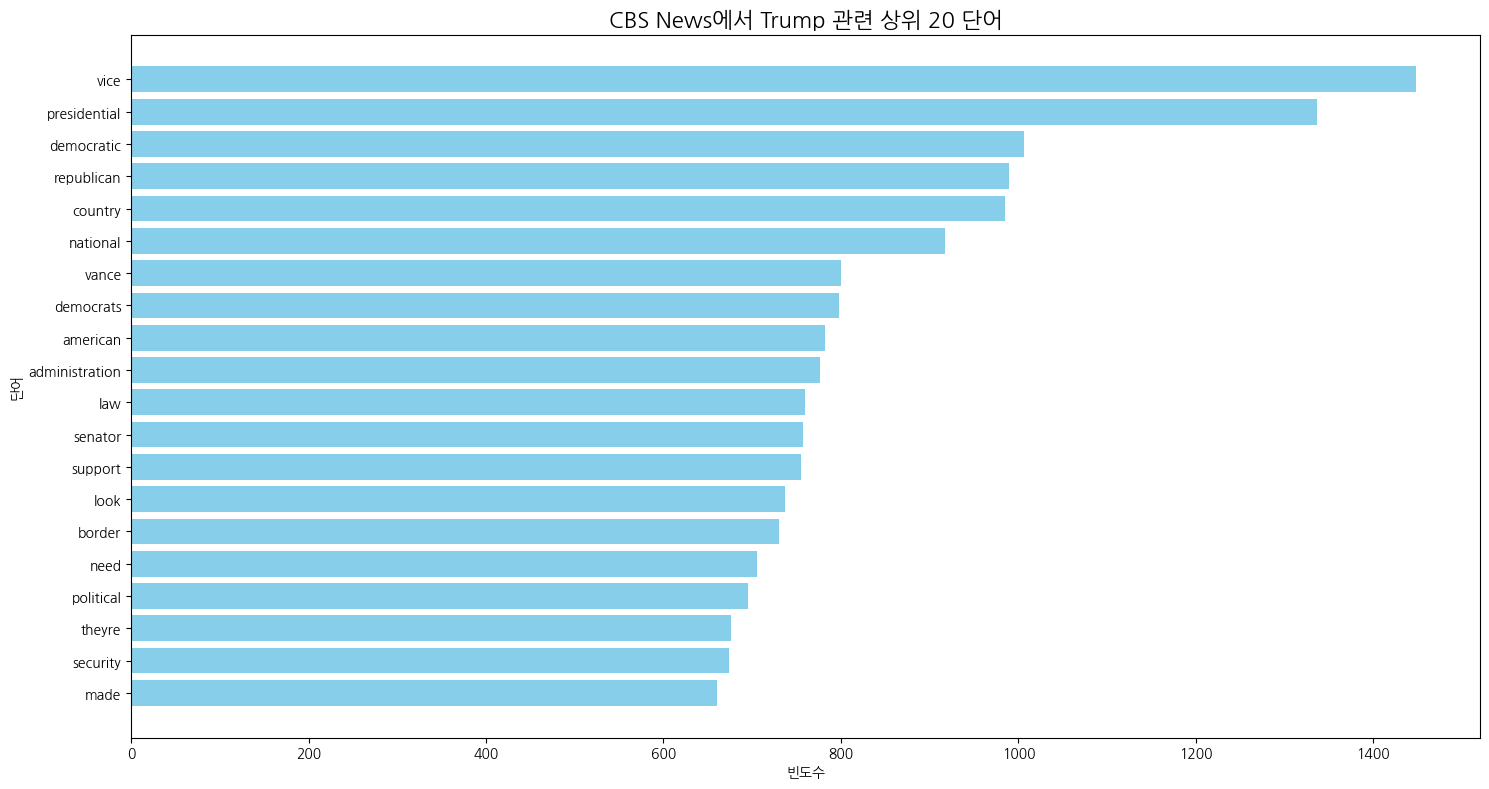

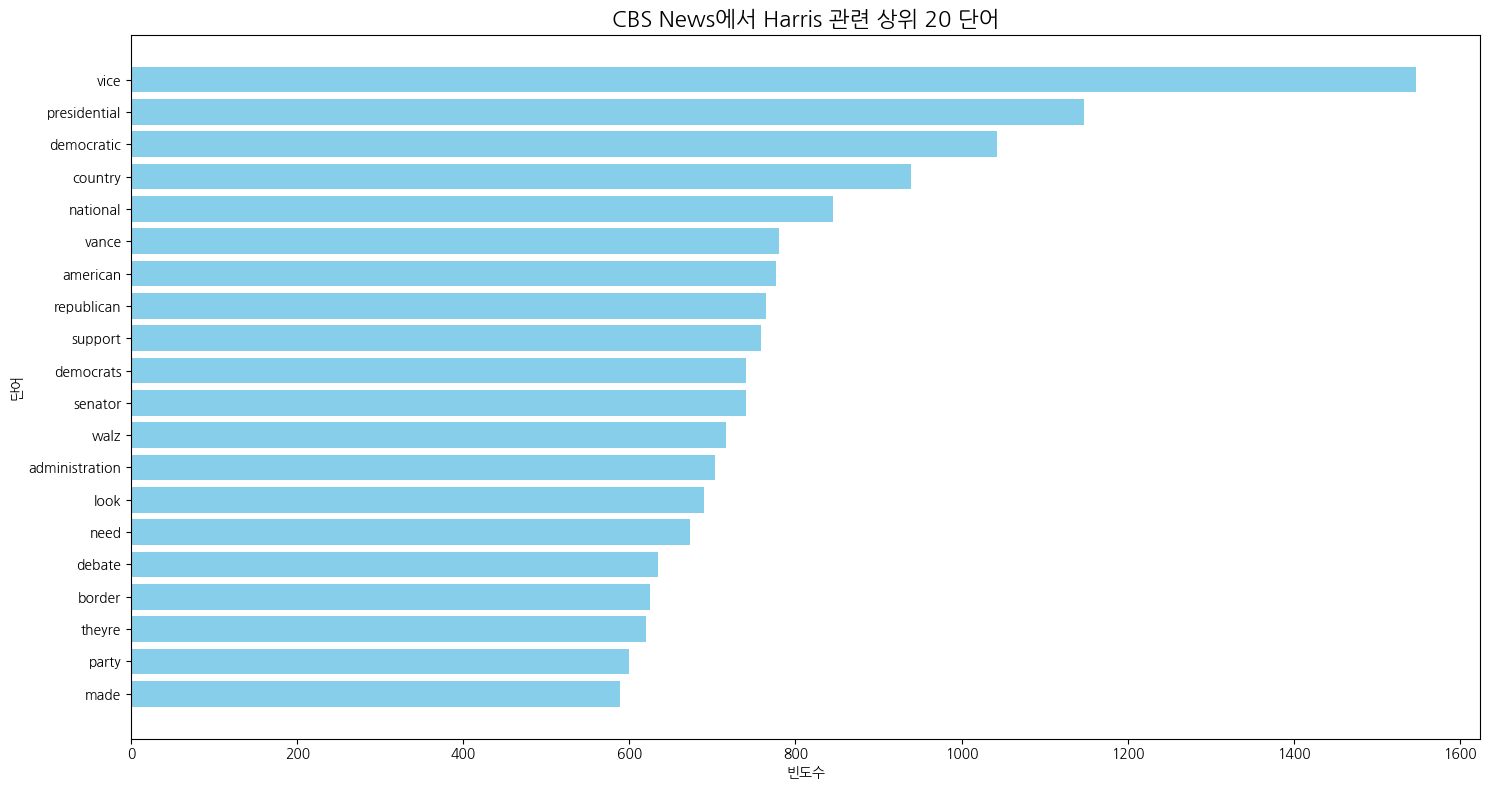

In [132]:
generate_bargraph(df_fox, 'Trump', 'FOX News', top_n=20)
generate_bargraph(df_fox, 'Harris', 'FOX News', top_n=20)
generate_bargraph(df_cbs, 'Trump', 'CBS News', top_n=20)
generate_bargraph(df_cbs, 'Harris', 'CBS News', top_n=20)